In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Set parameters
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx/(nx-1)
dy = Ly/(ny-1)
alpha = 1e-4

x = np.linspace(0.0, Lx, num=nx)
y = np.linspace(0.0, Ly, num=ny)

# Initial conditions
T0 = 20.0 * np.ones((ny,nx))
T0[0, :] = 100.0
T0[:, 0] = 100.0


In [3]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    I = int(nx / 2)
    J = int(ny / 2)
    for n in range(nt):
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                T[j, i] = (T[j, i] + 
                           sigma_x * (T[j, i-1] - 2 * T[j, i] + T[j, i+1]) + 
                           sigma_y * (T[j-1, i] - 2 * T[j, i] + T[j+1, i]))
        T[0, :] = 100.0  # Bottom
        T[:, 0] = 100.0  # Left
        T[-1, :] = T[-2,:] # Top                              
        T[:, -1] = T[:, -2] # Right
        if T[J, I] >= 70.0:
            break
    print('Time step {}; temperature at center is {} C'.format(n,T[J,I]))
    return T


In [4]:
sigma = 0.5
dt = sigma / (alpha * (1 / dx**2 + 1 / dy**2))
nt = 500

In [5]:
T = ftcs(T0, nt, dt, dx, dy, alpha)

Time step 127; temperature at center is 70.12723235676388 C


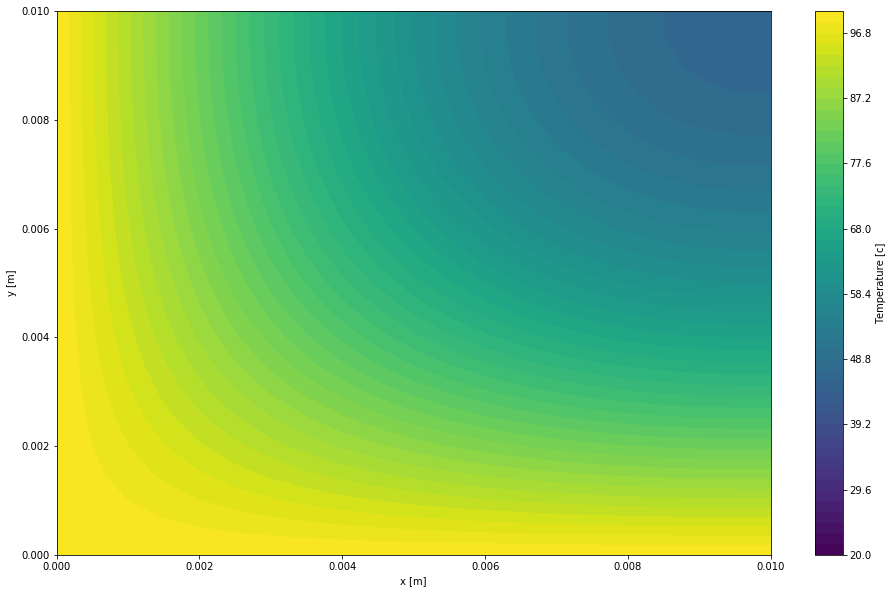

In [9]:
plt.figure(figsize=(16.0, 10.0))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
contf = plt.contourf(x, y, T, levels=np.linspace(20.0, 100.0, num=51))
cbar = plt.colorbar(contf)
cbar.set_label('Temperature [c]')